In [1]:
import pandas as pd
import numpy as np
import random as rd
import datetime
import matplotlib.pyplot as plt
links_paths_path = 'wikispeedia_paths-and-graph/'
#wpcd_path = './wpcd/'
#plaintext_articles_path = './plaintext_articles/'

In [51]:
#read the paths_finished.tsv
paths_finished_df = pd.read_csv(links_paths_path + 'paths_finished.tsv', sep='\t', \
                                names = ['hashedIpAddress','timestamp', 'durationInSec', 'path', 'rating'], \
                                skiprows=15)
paths_finished_df['year'] = paths_finished_df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).year)
paths_finished_df['path'] = paths_finished_df['path'].apply(lambda x: x.split(";"))

#see whether there are null elements in the dataset
paths_finished_df.isnull().sum()

hashedIpAddress        3
timestamp              0
durationInSec          0
path                   0
rating             22817
year                   0
dtype: int64

In [52]:
#drop the rows which have null elements in column 'hashedIpAddress'
paths_finished_df[~paths_finished_df['hashedIpAddress'].isnull()]

,hashedIpAddress,timestamp,durationInSec,path,rating,year
0,6a3701d319fc3754,1297740409,166,"[14th_century, 15th_century, 16th_century, Pac...",NaN,2011
1,3824310e536af032,1344753412,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3.0,2012
2,415612e93584d30e,1349298640,138,"[14th_century, Niger, Nigeria, British_Empire,...",NaN,2012
3,64dd5cd342e3780c,1265613925,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",NaN,2010
4,015245d773376aab,1366730828,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3.0,2013
...,...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,"[Yagan, Ancient_Egypt, Civilization]",NaN,2012
51314,2ef7ac844cefda58,1300254138,165,"[Yagan, Folklore, Brothers_Grimm, <, 19th_cent...",3.0,2011
51315,12863abb7887f890,1385095372,228,"[Yagan, Australia, England, France, United_Sta...",NaN,2013
51316,19f8284371753362,1298792567,56,"[Yarralumla%2C_Australian_Capital_Territory, A...",1.0,2011


The finished dataset contains data from 2008-2014 and the unfinished dataset only contains data from 2011-2014. We need to drop the dirty data from 2008-2010. In the meantime we need to handle the missing values.

In [53]:
#Only data from 2011-2014 are retained
query_year = [2011,2012,2013,2014]
paths_finished_df = paths_finished_df[paths_finished_df['year'].isin(query_year)] 

In [54]:
#read the paths_unfinished.tsv
paths_unfinished_df = pd.read_csv(links_paths_path + 'paths_unfinished.tsv', sep='\t',\
                                  names = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target','type'], \
                                  skiprows=17)
paths_unfinished_df['year'] = paths_unfinished_df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).year)
paths_unfinished_df['path'] = paths_unfinished_df['path'].apply(lambda x: x.split(";"))

#see whether there are null elements in the dataset
paths_finished_df.isnull().sum()

hashedIpAddress        0
timestamp              0
durationInSec          0
path                   0
rating             13104
year                   0
dtype: int64

In [55]:
#Only data from 2011-2014 are retained
query_year = [2011,2012,2013,2014]
paths_unfinished_df = paths_unfinished_df[paths_unfinished_df['year'].isin(query_year)] 

In [56]:
paths_df = pd.concat([paths_finished_df,paths_unfinished_df])
paths_df

,hashedIpAddress,timestamp,durationInSec,path,rating,year,target,type
0,6a3701d319fc3754,1297740409,166,"[14th_century, 15th_century, 16th_century, Pac...",NaN,2011,NaN,NaN
1,3824310e536af032,1344753412,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3.0,2012,NaN,NaN
2,415612e93584d30e,1349298640,138,"[14th_century, Niger, Nigeria, British_Empire,...",NaN,2012,NaN,NaN
4,015245d773376aab,1366730828,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3.0,2013,NaN,NaN
5,5295bca242be81fe,1372890414,110,"[14th_century, Europe, North_America, United_S...",NaN,2013,NaN,NaN
...,...,...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,"[Franz_Kafka, Tuberculosis, World_Health_Organ...",NaN,2014,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,[Modern_history],NaN,2014,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,"[Computer_programming, Linguistics, Culture, P...",NaN,2014,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,"[Jamaica, United_Kingdom, World_War_II, Battle...",NaN,2014,Alan_Turing,timeout


In [57]:
paths_df.groupby('year').agg('count')

,hashedIpAddress,timestamp,durationInSec,path,rating,target,type
year,,,,,,,
2011,13737,13737,13737,13737,3300,6878,6878
2012,17790,17790,17790,17790,3716,8895,8895
2013,16519,16519,16519,16519,3566,8773,8773
2014,650,650,650,650,135,329,329


In [58]:
#split the strings in the column 'path' and transform them into lists
path_list_2011 = paths_df['path'][paths_df['year'] == 2011]
path_list_2012 = paths_df['path'][paths_df['year'] == 2012]
path_list_2013 = paths_df['path'][paths_df['year'] == 2013]
# path_list_2014 = paths_finished_df['path'][paths_finished_df['year'] == 2014].apply(lambda x: x.split(";"))

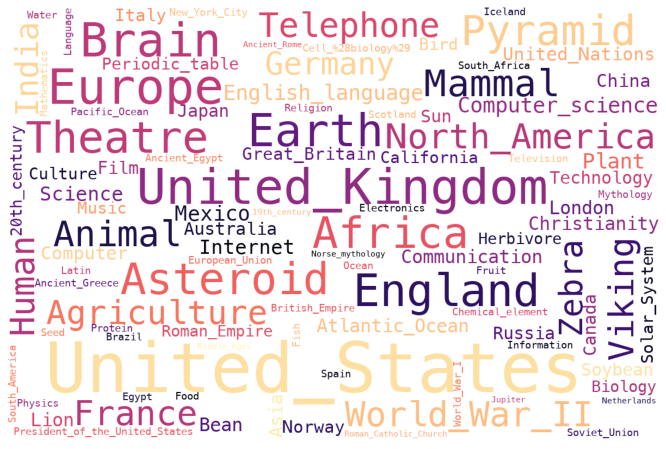

[('United_States', 2151),
 ('United_Kingdom', 913),
 ('Europe', 908),
 ('Brain', 828),
 ('Earth', 776),
 ('England', 762),
 ('Asteroid', 726),
 ('Theatre', 721),
 ('Africa', 694),
 ('Pyramid', 636),
 ('Mammal', 504),
 ('Animal', 459),
 ('France', 436),
 ('World_War_II', 436),
 ('North_America', 436),
 ('Viking', 436),
 ('Telephone', 421),
 ('Human', 415),
 ('Agriculture', 401),
 ('Zebra', 378),
 ('India', 359),
 ('Germany', 352),
 ('Computer_science', 345),
 ('Plant', 344),
 ('English_language', 341),
 ('Mexico', 329),
 ('Science', 289),
 ('Internet', 281),
 ('Atlantic_Ocean', 257),
 ('Communication', 255),
 ('London', 253),
 ('Lion', 251),
 ('Bean', 244),
 ('Christianity', 242),
 ('Asia', 240),
 ('China', 227),
 ('United_Nations', 225),
 ('Computer', 224),
 ('Japan', 217),
 ('Sun', 217),
 ('Russia', 211),
 ('Film', 211),
 ('Canada', 206),
 ('Australia', 203),
 ('Soybean', 198),
 ('Technology', 197),
 ('Great_Britain', 196),
 ('Norway', 195),
 ('Italy', 194),
 ('Periodic_table', 193),


In [59]:
from collections import Counter
import wordcloud

def word_cnt(wlist):
    '''
    Count the number of occurrences of each term in all paths
    '''
    word_counts = Counter()
    
    for line in wlist:
        word_counts.update(line)
    
    return sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

def pic_words(list_):
    '''
    Draw the wordcloud plot to have a visual representation of how often they appear
    '''
    words_dict = {}
    for idx,item in enumerate(list_):
        words_dict[item[0]] = item[1]
    
    cloudobj = wordcloud.WordCloud(
        font_path='/System/Library/Fonts/menlo.ttc',
        height = 800, width = 1200, mode = "RGBA", background_color = 'white', colormap='magma'
                                  ).fit_words(words_dict)
    plt.rcParams['figure.figsize'] = (12.0, 8.0)    
    plt.imshow(cloudobj)
    plt.axis("off")
    plt.show()

#Eliminate the most high frequent word "<", take [1:51]   
counter_list_2011 = word_cnt(path_list_2011)
TOP100_2011 = counter_list_2011[1:101]

pic_words(TOP100_2011)
TOP100_2011

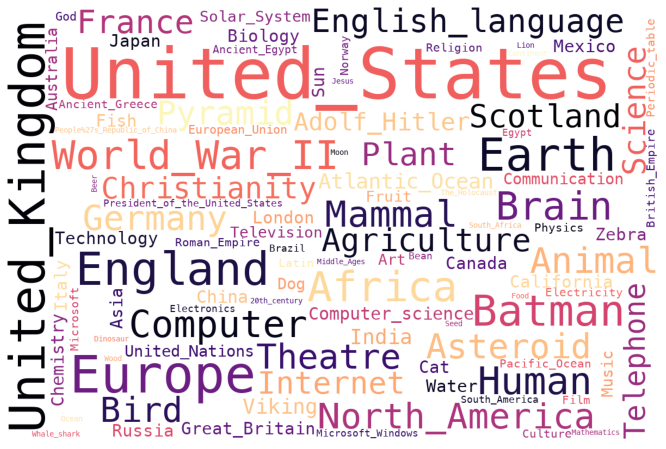

[('United_States', 2665),
 ('Europe', 1275),
 ('United_Kingdom', 1130),
 ('Earth', 987),
 ('England', 977),
 ('Batman', 842),
 ('Africa', 793),
 ('World_War_II', 732),
 ('Brain', 698),
 ('Human', 673),
 ('Computer', 637),
 ('Mammal', 604),
 ('Animal', 579),
 ('North_America', 556),
 ('Asteroid', 542),
 ('Bird', 535),
 ('Germany', 532),
 ('Theatre', 527),
 ('Pyramid', 482),
 ('France', 461),
 ('English_language', 455),
 ('Agriculture', 442),
 ('Plant', 438),
 ('Scotland', 434),
 ('Science', 419),
 ('Internet', 410),
 ('Christianity', 407),
 ('Telephone', 399),
 ('Adolf_Hitler', 394),
 ('Atlantic_Ocean', 375),
 ('India', 364),
 ('Viking', 357),
 ('Computer_science', 351),
 ('Sun', 343),
 ('Chemistry', 339),
 ('China', 338),
 ('Fish', 315),
 ('Cat', 310),
 ('Asia', 303),
 ('Russia', 294),
 ('Mexico', 287),
 ('Zebra', 282),
 ('California', 278),
 ('London', 276),
 ('Biology', 272),
 ('Canada', 272),
 ('Great_Britain', 270),
 ('Water', 264),
 ('Italy', 258),
 ('Technology', 255),
 ('Japan',

In [60]:
counter_list_2012 = word_cnt(path_list_2012)
TOP100_2012 = counter_list_2012[1:101]
pic_words(TOP100_2012)
TOP100_2012

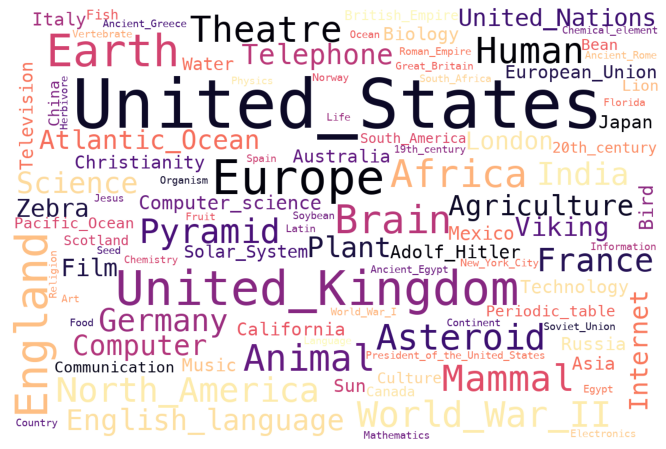

[('United_States', 2708),
 ('United_Kingdom', 1089),
 ('Europe', 1088),
 ('Earth', 942),
 ('England', 939),
 ('Brain', 721),
 ('Africa', 689),
 ('Animal', 634),
 ('Theatre', 608),
 ('Mammal', 601),
 ('Human', 600),
 ('World_War_II', 574),
 ('Asteroid', 574),
 ('North_America', 516),
 ('Pyramid', 509),
 ('France', 465),
 ('India', 440),
 ('Germany', 439),
 ('English_language', 409),
 ('Science', 405),
 ('Plant', 390),
 ('Telephone', 378),
 ('Agriculture', 375),
 ('Computer', 373),
 ('Atlantic_Ocean', 364),
 ('Viking', 364),
 ('Internet', 338),
 ('Zebra', 325),
 ('London', 320),
 ('United_Nations', 306),
 ('Film', 302),
 ('Computer_science', 300),
 ('Bird', 298),
 ('Mexico', 288),
 ('Japan', 276),
 ('Italy', 272),
 ('Australia', 267),
 ('Asia', 266),
 ('Television', 263),
 ('Russia', 260),
 ('Biology', 257),
 ('California', 257),
 ('Christianity', 256),
 ('Music', 256),
 ('Adolf_Hitler', 255),
 ('European_Union', 253),
 ('Sun', 251),
 ('Technology', 251),
 ('Water', 242),
 ('Solar_System

In [61]:
counter_list_2013 = word_cnt(path_list_2013)
TOP100_2013 = counter_list_2013[1:101]
pic_words(TOP100_2013)
TOP100_2013

The most popular articles can be divided into several broad categories, such as country, subject, etc.

In [62]:
list_2011 = []
list_2012 = []
list_2013 = []

for idx,item in enumerate(TOP100_2011):
    list_2011.append(item[0])
    
for idx,item in enumerate(TOP100_2012):
    list_2012.append(item[0])
    
for idx,item in enumerate(TOP100_2013):
    list_2013.append(item[0])
    
#Calculation of words appearing in the TOP100 for all three years
print(len(list(set(list_2011).intersection(set(list_2012)).intersection(list_2013))))

79


Of the TOP 100, 79 articles appeared in all three years

In [25]:
import os
import sys
import utils
import gensim
import sklearn
import numpy as np
from gensim.models.doc2vec import Doc2Vec
TaggededDocument = gensim.models.doc2vec.TaggedDocument
from nltk import word_tokenize

def cut_drop_stop_words(content):
    '''
    Tokenize the doc to words
    Get the stop words from txt and drop them form articles
    :return: a cut word list
    '''
    
    stop_words = []
    with open('./en_stopwords.txt', 'r', encoding="latin-1") as f_reader:
        for line in f_reader:
            line = line.replace("\r", "").replace("\n", "")
            stop_words.append(line)
    stop_words.append('●')
    stop_words.append(',')
    stop_words = set(stop_words)
    
    if content != '' and content is not None:
        seg_list = word_tokenize(content)
        each_split = ' '.join(seg_list).split()
        each_result = [word for word in each_split if word not in stop_words] #drop stop words
        result = ' '.join(each_result)
    return result

def get_file_data_to_a_list(file_list):
    '''
    Read all article paths into a list of file paths, and read the data in each file in turn, saving all data into one file
    '''
    file_paths = []
    data = []
    for idx,item in enumerate(file_list):
        file_paths.append('./plaintext_articles/' + item + '.txt')
    
    for filename in file_paths:
        f = open(filename,'r',encoding="latin-1")
        doc = f.read().replace("\t", "").replace("\n", "")
        data.append(cut_drop_stop_words(doc))

    return data

def get_cut_dataset(data):
    '''
    Generate corpus(using tokenized word list)
    '''
    corpus = []
    documents = []

    for idx, item in enumerate(data):
        text = list(item.replace('\n', '').split(' '))
        # print(text)
        document = TaggededDocument(text, tags=[idx])
        corpus.append(document)
    print('len of corpus：', len(corpus))

    return corpus


def train(x_train, model_path , size=200, epoch_num=20, dm=1):
    print('start train')
    model_dm = Doc2Vec(x_train, min_count=10, window=5, vector_size=size, sample=1e-3, negative=5, workers=4, dm=dm)
    model_dm.train(x_train, total_examples=model_dm.corpus_count, epochs=epoch_num)
    model_dm.save(model_path)
    print('end train')
    return model_dm


def test_(model_path, str):
    model_dm = Doc2Vec.load(model_path)
    test_text = ' '.join(word_tokenize(str)).split(' ')
    inferred_vector_dm = model_dm.infer_vector(test_text)
    print('inferred_vector_dm:', inferred_vector_dm)
    sims = model_dm.dv.most_similar([inferred_vector_dm], topn=1)
    return sims

# Train model for 2011 TOP100
model_path = './model_2011'
temp = get_file_data_to_a_list(list_2011)
train_corpus = get_cut_dataset(temp)
model_dm_2011 = train(train_corpus, model_path=model_path)

# Use an article to test whether that the most similar one is itself
f = open('./plaintext_articles/United_States.txt','r',encoding="latin-1")
test = f.read().replace("\t", "").replace("\n", "")

sims = test_(model_path, test)
for count,sim in sims:
    sentence = train_corpus[count]
    words = ''
    for word in sentence[0][:200]:
        words = words + word + ' '
    print(words, sim)


len of corpus： 100
start train
end train
inferred_vector_dm: [-0.71423715  0.14394528  2.061612    3.012402    1.1567165   2.0613122
  0.29593387 -3.2157784  -2.6793609   0.8560852   5.861293   -0.48596692
 -2.2367349  -4.2242284  -0.52633286 -2.7516289  -2.267044    2.7835283
 -2.7876167  -2.6126323  -1.1473188   1.7681205  -1.8293941   1.1683471
  1.5862851  -1.5479385   1.5793022  -3.6017818  -0.8574361  -2.3879006
  0.96411896 -0.92999524  0.389795   -0.27241638  1.2821807  -0.7331275
  1.1264452   2.3251383   0.02458427 -3.8657703  -1.3349389  -0.18105097
  0.5177952  -0.05005478  1.1452665  -0.9148044   0.02615971  0.40170035
  3.5475378  -2.9987593   0.64361954  1.7820714  -1.9935913  -0.9626179
  0.8133771   3.463622    0.11935689  0.97431743 -3.480233    1.6104922
  0.86828613  1.4138955   2.1772435  -4.0933514   1.4103186  -1.3336322
  1.4367297   1.0395681  -0.48296368 -2.8408875  -0.60394126  0.6538452
 -2.1934981   0.91353154 -0.09538817 -0.31199315 -0.98377645 -4.2368903


array([[ 1.00000012,  0.04901813,  0.03862661, ..., -0.04285764,
         0.02731535,  0.07915014],
       [ 0.04901813,  1.00000012,  0.197092  , ...,  0.03291288,
        -0.06506269, -0.15429811],
       [ 0.03862661,  0.197092  ,  1.        , ...,  0.03346352,
         0.0723601 ,  0.03692476],
       ...,
       [-0.04285764,  0.03291288,  0.03346352, ...,  1.        ,
         0.18355981,  0.15305389],
       [ 0.02731535, -0.06506269,  0.0723601 , ...,  0.18355981,
         1.00000012,  0.14288194],
       [ 0.07915014, -0.15429811,  0.03692476, ...,  0.15305389,
         0.14288194,  1.00000012]])

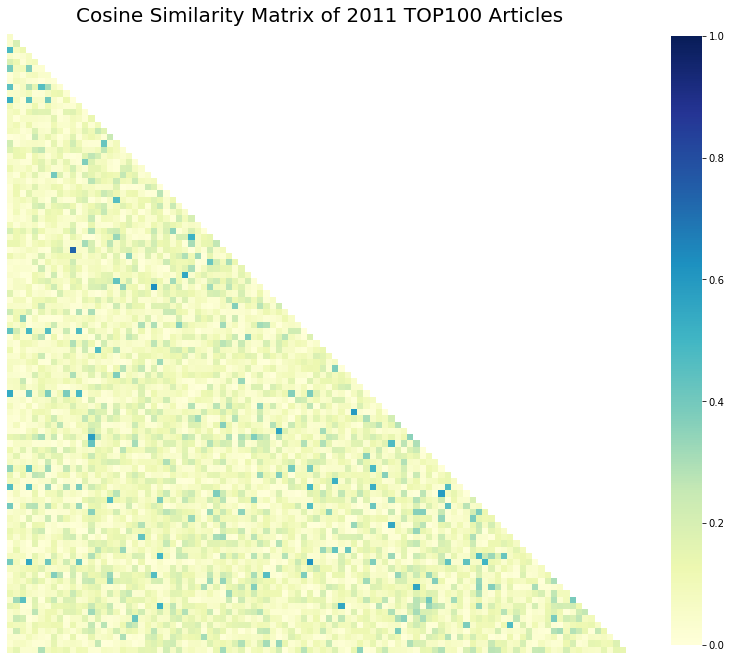

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch


model_dm = Doc2Vec.load(model_path)
matrix = model_dm[list(range(100))]

# Calculate cosine similarity matrix of top articles to represent their semantic similarity
cos_sim = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        cos_sim[i,j] = matrix[i].dot(matrix[j]) / (np.linalg.norm(matrix[i]) * np.linalg.norm(matrix[j]))

# heatmap of Cosine Similarity Matrix 
mask = np.zeros_like(cos_sim, dtype = bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (14,14))
ax = fig.add_subplot()
sns.heatmap(np.abs(cos_sim), ax=ax, mask = mask, cmap="YlGnBu", square=True, fmt='.3g',\
             vmax=1, vmin=0 , annot=False, cbar=True,cbar_kws={"shrink": 0.8})
plt.title("Cosine Similarity Matrix of 2011 TOP100 Articles", fontsize = 20)
plt.axis('off')
plt.savefig('SimMatrix2011.png', bbox_inches='tight')

cos_sim

Using the Doc2vec model, we computed the vector representation of each article after embedding. Through the similarity matrix we can initially infer that articles have different semantic distances from each other. We can compare the distances derived from machine learning with the reachable distances presented by the user in the game

In [28]:
categories_df = pd.read_csv(links_paths_path + 'categories.tsv', sep='\t',\
                                  names = ['article', 'category'],  skiprows=13)
categories_df

,article,category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Countries
3,%C3%85land,subject.Geography.European_Geography.European_...
4,%C3%89douard_Manet,subject.People.Artists
...,...,...
5199,Zirconium,subject.Science.Chemistry.Chemical_elements
5200,Zoroaster,subject.People.Religious_figures_and_leaders
5201,Zuid-Gelders,subject.Geography.European_Geography
5202,Zuid-Gelders,subject.Language_and_literature.Languages


In [29]:
# Take the penultimate category of the hierarchy
categories_df['category'] = categories_df['category'].apply(lambda x: x.split("."))
categories_df['category'] = categories_df['category'].apply(lambda x: x[-2])

In [30]:
categories_df['category'].unique()

array(['British_History', 'People', 'subject', 'European_Geography',
       'Business_Studies', 'History', 'Physics', 'Everyday_life',
       'Geography', 'Design_and_Technology', 'Biology', 'Music', 'IT',
       'Language_and_literature', 'Religion', 'Geography_of_Asia', 'Art',
       'Geography_of_the_Middle_East', 'Chemistry', 'Citizenship',
       'African_Geography', 'Central_and_South_American_Geography'],
      dtype=object)

In [31]:
# Fix the hierarchy so that all levels are at the same semantic level
categories_df['category'][categories_df['category'] == 'British_History'] = 'History'
geo = ['African_Geography','Geography_of_Asia','Geography_of_the_Middle_East','Central_and_South_American_Geography']
categories_df['category'][categories_df['category'].isin(geo)] = 'Geography'
categories_df['category'].unique()             

array(['History', 'People', 'subject', 'European_Geography',
       'Business_Studies', 'Physics', 'Everyday_life', 'Geography',
       'Design_and_Technology', 'Biology', 'Music', 'IT',
       'Language_and_literature', 'Religion', 'Art', 'Chemistry',
       'Citizenship'], dtype=object)

In [32]:
categories_df

,article,category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,History
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,People
2,%C3%85land,subject
3,%C3%85land,European_Geography
4,%C3%89douard_Manet,People
...,...,...
5199,Zirconium,Chemistry
5200,Zoroaster,People
5201,Zuid-Gelders,Geography
5202,Zuid-Gelders,Language_and_literature


From this we obtained the category to which each article belongs

In [73]:
def distance_to_end(TOPlist, PATHlist):
    '''
    create a dictionary that records the first appearing position to the end of every article name in paths df
    '''
    position_to_end_dict = {}
    k = 0
    for article_name in TOPlist:
        position_to_end_dict[article_name] = []
        for path in PATHlist:
            if article_name in path:
                length = len(path) #the length of the whole path
                index = path.index(article_name) #the first position where the article_name appears
                position_to_end = length - index - 1 #the distance between the position and the end
                position_to_end_dict[article_name].append(position_to_end)
            else:
                #for paths where the article_name does not exist, use nan to fill in the blank
                position_to_end_dict[article_name].append(np.nan)
        k = k + 1  
    return position_to_end_dict

In [74]:
finished_distance_dict_2011 = distance_to_end(list_2011, paths_finished_df['path'][paths_finished_df['year'] == 2011])
position_to_end_pd_finished_2011 = pd.DataFrame(finished_distance_dict_2011)
position_to_end_pd_finished_2011

,United_States,United_Kingdom,Europe,Brain,Earth,England,Asteroid,Theatre,Africa,Pyramid,...,Chemical_element,Fruit,Language,Roman_Catholic_Church,Middle_Ages,Norse_mythology,19th_century,Jupiter,Netherlands,Ancient_Rome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6854,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
6857,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
unfinished_distance_dict_2011 = distance_to_end(list_2011, paths_unfinished_df['path'][paths_unfinished_df['year'] == 2011])
position_to_end_pd_unfinished_2011 = pd.DataFrame(unfinished_distance_dict_2011)
position_to_end_pd_unfinished_2011
# 0.0 means it is the last point in the path

,United_States,United_Kingdom,Europe,Brain,Earth,England,Asteroid,Theatre,Africa,Pyramid,...,Chemical_element,Fruit,Language,Roman_Catholic_Church,Middle_Ages,Norse_mythology,19th_century,Jupiter,Netherlands,Ancient_Rome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
6876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
def position_to_end_avg(distance_dict):
    '''
    Compute the average of the distance between all the article_names and their ends
    and the rate that the path finishes in 3 words after the first appearance of article_name
    '''
    position_to_end_avg = {}
    for article_name in distance_dict:
        total_num = 0 #the total number of the times article_name appears
        goal_num = 0 #the number of the times the position_to_end of article_name is smaller than 3
        total_dist_num = 0 #the sum of the distance between all the artilce_names and their ends
        for distance in distance_dict[article_name]:
            if distance > -1:
                if distance < 3:
                    goal_num += 1
                total_num += 1
                total_dist_num += distance
        avg_dist = total_dist_num / total_num #the average of the distance between all the article_names and their ends
        avg_rate = goal_num / total_num #the rate that the path finishes in 3 words after the first appearance of article_name
        position_to_end_avg[article_name] = [avg_dist, avg_rate]
    return position_to_end_avg

In [78]:
position_to_end_avg_finished_2011 = position_to_end_avg(finished_distance_dict_2011)
position_to_end_avg_finished_2011

{'United_States': [4.234821428571428, 0.4348214285714286],
 'United_Kingdom': [3.918, 0.462],
 'Europe': [3.7461139896373057, 0.4939550949913644],
 'Brain': [5.985645933014354, 0.023923444976076555],
 'Earth': [4.339468302658487, 0.25357873210633947],
 'England': [4.286407766990291, 0.3883495145631068],
 'Asteroid': [6.697892271662764, 0.02107728337236534],
 'Theatre': [6.8, 0.018421052631578946],
 'Africa': [3.691211401425178, 0.4655581947743468],
 'Pyramid': [6.678714859437751, 0.028112449799196786],
 'Mammal': [3.2542372881355934, 0.6847457627118644],
 'Animal': [4.141221374045801, 0.46564885496183206],
 'France': [4.766798418972332, 0.33201581027667987],
 'World_War_II': [3.698841698841699, 0.4555984555984556],
 'North_America': [4.113924050632911, 0.3206751054852321],
 'Viking': [0.0995260663507109, 0.985781990521327],
 'Telephone': [0.11970074812967581, 0.9850374064837906],
 'Human': [4.476190476190476, 0.45454545454545453],
 'Agriculture': [4.625641025641026, 0.38461538461538464

In [79]:
position_to_end_avg_unfinished_2011 = position_to_end_avg(unfinished_distance_dict_2011)
position_to_end_avg_unfinished_2011

{'United_States': [4.443376068376068, 0.4722222222222222],
 'United_Kingdom': [4.784574468085107, 0.550531914893617],
 'Europe': [5.180921052631579, 0.48026315789473684],
 'Brain': [3.103448275862069, 0.5615763546798029],
 'Earth': [5.721611721611722, 0.3626373626373626],
 'England': [4.665653495440729, 0.5167173252279635],
 'Asteroid': [3.664429530201342, 0.4697986577181208],
 'Theatre': [3.9911764705882353, 0.43529411764705883],
 'Africa': [3.7510204081632654, 0.5510204081632653],
 'Pyramid': [4.506459948320414, 0.3333333333333333],
 'Mammal': [4.417582417582418, 0.4835164835164835],
 'Animal': [4.785714285714286, 0.521978021978022],
 'France': [4.2057142857142855, 0.4514285714285714],
 'World_War_II': [4.234939759036145, 0.5120481927710844],
 'North_America': [3.9743589743589745, 0.47692307692307695],
 'Viking': [5.923076923076923, 0.5384615384615384],
 'Telephone': [5.8, 0.45],
 'Human': [6.118343195266272, 0.35502958579881655],
 'Agriculture': [3.5526315789473686, 0.52631578947368

In [80]:
def avg_duration(TOPlist,PATHdict,TOP):
    '''
    Compute the average duration time of article_names in toplist
    '''
    top_time_dict = {}
    for article_name in TOPlist:
        time_dura_sum = 0
        times = 0
        for i in PATHdict:
            if article_name in PATHdict[i]['path']:
                time_dura_sum += PATHdict[i]['durationInSec']
                times += 1
        time_avg = time_dura_sum / TOP[idx][1]
        top_time_dict[article_name] = time_avg
    return top_time_dict

top100_finished_time_dict_2011 = avg_duration(list_2011,paths_finished_df[paths_finished_df['year']==2011].to_dict('index'))
top100_finished_time_dict_2011

{'United_States': 180.31339285714284,
 'United_Kingdom': 180.742,
 'Europe': 168.2348877374784,
 'Brain': 170.66267942583733,
 'Earth': 170.43558282208588,
 'England': 192.59708737864077,
 'Asteroid': 207.04449648711943,
 'Theatre': 224.1657894736842,
 'Africa': 203.11163895486936,
 'Pyramid': 194.45381526104418,
 'Mammal': 241.12542372881356,
 'Animal': 229.0,
 'France': 217.10276679841897,
 'World_War_II': 171.63320463320463,
 'North_America': 198.31223628691984,
 'Viking': 199.5165876777251,
 'Telephone': 170.20448877805487,
 'Human': 232.9090909090909,
 'Agriculture': 232.82051282051282,
 'Zebra': 229.3451086956522,
 'India': 173.81675392670158,
 'Germany': 148.80180180180182,
 'Computer_science': 166.39814814814815,
 'Plant': 182.34117647058824,
 'English_language': 158.56179775280899,
 'Mexico': 225.97857142857143,
 'Science': 178.15976331360946,
 'Internet': 240.2,
 'Atlantic_Ocean': 303.9925373134328,
 'Communication': 163.60352422907488,
 'London': 189.03937007874015,
 'Lion':

In [71]:
top100_unfinished_time_dict_2011 = avg_duration(list_2011,paths_unfinished_df[paths_unfinished_df['year']==2011].to_dict('index'))
top100_unfinished_time_dict_2011

{'United_States': 943.9541229385308,
 'United_Kingdom': 948.3958641063515,
 'Europe': 944.678391959799,
 'Brain': 827.1482504604052,
 'Earth': 934.305785123967,
 'England': 967.8270547945206,
 'Asteroid': 895.7937336814622,
 'Theatre': 861.6871628910463,
 'Africa': 933.7923784494087,
 'Pyramid': 849.0416233090531,
 'Mammal': 996.6947040498443,
 'Animal': 958.6958981612447,
 'France': 965.4478827361563,
 'World_War_II': 960.6436781609195,
 'North_America': 969.6219336219336,
 'Viking': 961.9852941176471,
 'Telephone': 660.1525423728814,
 'Human': 1018.8502824858757,
 'Agriculture': 902.5958646616541,
 'Zebra': 841.2857142857143,
 'India': 921.316504854369,
 'Germany': 962.8818181818182,
 'Computer_science': 904.040650406504,
 'Plant': 967.0460251046026,
 'English_language': 1000.795918367347,
 'Mexico': 902.0810276679842,
 'Science': 959.7596153846154,
 'Internet': 963.6796338672768,
 'Atlantic_Ocean': 928.2836538461538,
 'Communication': 818.6140350877193,
 'London': 1042.4180929095355

In [85]:
def failtype(TOPlist,PATHdict):
    '''
    Count the times of the appearances of timeout times with ratio & restart times with ratio in top100_list
    '''
    failure_type_dict = {}
    for idx,article in enumerate(TOPlist):
        timeout_sum = 0
        restart_sum = 0
        for i in PATHdict:
            if article[0] in PATHdict[i]['path']:
                if PATHdict[i]['type'] == 'timeout':
                    timeout_sum += 1
                else:
                    restart_sum += 1
        timeout_ratio = timeout_sum/article[1]
        restart_ratio = restart_sum/article[1]
        failure_type_dict[article[0]] = [timeout_sum, timeout_ratio, restart_sum, restart_ratio]
    return failure_type_dict

top100_failure_type_dict_2011 = failtype(TOP100_2011,paths_unfinished_df[paths_unfinished_df['year']==2011].to_dict('index'))
top100_failure_type_dict_2011

{'United_States': [371, 0.1724779172477917, 565, 0.2626685262668526],
 'United_Kingdom': [159, 0.1741511500547645, 217, 0.23767798466593648],
 'Europe': [134, 0.14757709251101322, 170, 0.18722466960352424],
 'Brain': [154, 0.1859903381642512, 252, 0.30434782608695654],
 'Earth': [126, 0.16237113402061856, 147, 0.18943298969072164],
 'England': [144, 0.1889763779527559, 185, 0.24278215223097113],
 'Asteroid': [142, 0.19559228650137742, 156, 0.21487603305785125],
 'Theatre': [154, 0.21359223300970873, 186, 0.2579750346740638],
 'Africa': [94, 0.13544668587896252, 151, 0.21757925072046108],
 'Pyramid': [165, 0.25943396226415094, 222, 0.3490566037735849],
 'Mammal': [75, 0.1488095238095238, 107, 0.2123015873015873],
 'Animal': [73, 0.15904139433551198, 109, 0.2374727668845316],
 'France': [69, 0.15825688073394495, 106, 0.24311926605504589],
 'World_War_II': [73, 0.16743119266055045, 93, 0.21330275229357798],
 'North_America': [68, 0.1559633027522936, 127, 0.29128440366972475],
 'Viking': [

In [86]:
# Read the articles' names in the articles.tsv
articles_df = pd.read_csv(links_paths_path + 'articles.tsv', sep='\t',\
                                  names = ['article'],  skiprows=12)

In [90]:
# Generate a random article list which has the same size as TOP list as control group
random_data = articles_df.sample(n=100)
random_list = np.array(random_data).tolist()
random_list

[['Great_Comet_of_1882'],
 ['History_of_Earth'],
 ['Bede'],
 ['Sears_Catalog_Home'],
 ['Tuna'],
 ['Amish'],
 ['Heraldry'],
 ['Polymerase_chain_reaction'],
 ['U.S._Navy_Marine_Mammal_Program'],
 ['Plum'],
 ['Mauthausen-Gusen_concentration_camp'],
 ['J._J._Thomson'],
 ['Yotsuya_Kaidan'],
 ['Fermium'],
 ['Mythology'],
 ['Gordon_Brown'],
 ['Barcelona'],
 ['Religion'],
 ['Thailand'],
 ['Tim_Henman'],
 ['Birth_control'],
 ['Nirvana_%28band%29'],
 ['Tay-Sachs_disease'],
 ['Polar_coordinate_system'],
 ['Perl'],
 ['Butter'],
 ['Pali_Canon'],
 ['Kyrgyzstan'],
 ['Iron%28III%29_chloride'],
 ['Tasmanian_Devil'],
 ['Mountain_Gorilla'],
 ['Cardiff'],
 ['Phosphorus'],
 ['Iraq_and_weapons_of_mass_destruction'],
 ['Lighting_designer'],
 ['Athletics_%28track_and_field%29'],
 ['Sodium_sulfate'],
 ['Battle_of_the_Little_Bighorn'],
 ['Flag_of_Australia'],
 ['Superconductivity'],
 ['David_Blanchflower'],
 ['Hickman%27s_potentilla'],
 ['Colima_%28volcano%29'],
 ['Italo_disco'],
 ['Buddhist_art'],
 ['Glorious_